In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline

headers=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','salary']
df= pd.read_csv("CourseProject.txt", names=headers, converters={'salary': str.strip, 'native-country': str.strip, 'age': str.strip, 'workclass': str.strip, 'fnlwgt': str.strip, 'education': str.strip, 'education-num': str.strip, 'marital-status': str.strip, 'occupation': str.strip, 'relationship': str.strip, 'race': str.strip, 'sex': str.strip, 'capital-gain': str.strip, 'capital-loss': str.strip, 'hours-per-week': str.strip})
#df= pd.read_csv("CourseProject.txt", names=headers)

for val in headers:
    df= df[df[val] != '?']
    
#print(len(df)) 30162
#print(df['workclass'].value_counts())



[13984, 8670]
[6396, 1112]


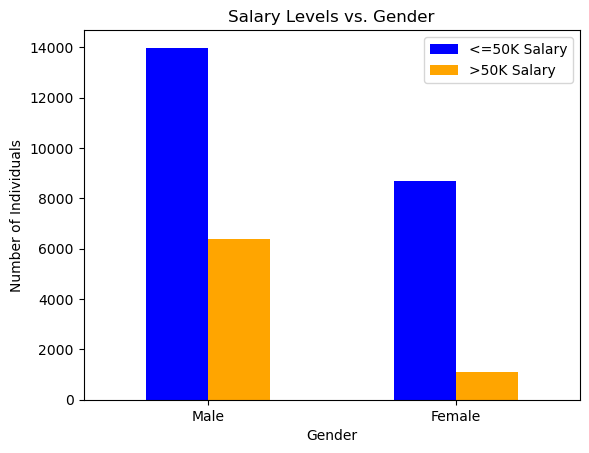

In [600]:
#print(df2.value_counts("native-country"))
#workclass 1836 = ?, occupation 1843 = ?, native-country = 583 = ?

#print(len(df)) #32561
#print(len(df2)) #30162

salary1=[0, 0]
salary2=[0, 0]
gender=["Male", "Female"]


for x in range(len(df)): 
    if df.iloc[x]['sex']=='Male':

for x in range(len(df)):
    if df.iloc[x]['sex']=='Male':
        if df.iloc[x]['salary']== "<=50K":
            salary1[0] += 1
        else:
            salary2[0] += 1
    elif df.iloc[x]['sex']=='Female':
        if df.iloc[x]['salary']== "<=50K":
            salary1[1] += 1
        else:
            salary2[1] += 1          
        

print(salary1)
print(salary2)

colors=["blue", "orange"]

df3= pd.DataFrame({'<=50K Salary': salary1,'>50K Salary': salary2}, index=["Male", "Female"])
ax= df3.plot.bar(title="Salary Levels vs. Gender", ylabel= "Number of Individuals", rot=0, xlabel= "Gender", color= colors)

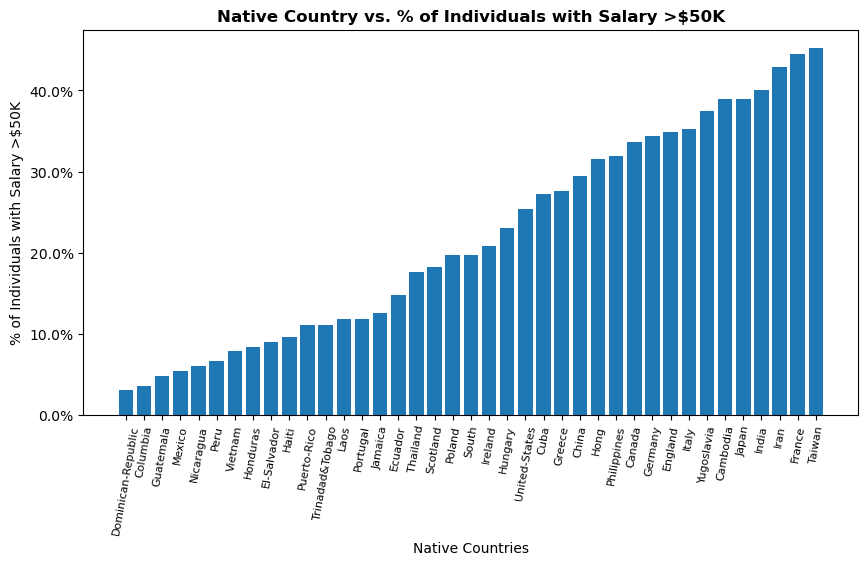

In [303]:
from matplotlib.ticker import PercentFormatter
country={}
gender=["Male", "Female"]


for x in range(len(df)):
    my=df.iloc[x]['native-country']
    if my in country.keys():
        if df.iloc[x]['salary']== "<=50K":
            country[my]['l'] += 1
        else:
            country[my]['g'] += 1
    else:
        if df.iloc[x]['salary']== "<=50K":
            country[my]={'l': 1, 'g': 0}
        else:
            country[my]={'l': 0, 'g': 1}
            
#print(country.keys())

rate=[]
cName=country.keys()
myVal={}

for x in cName:
    rate= country[x]['g'] / (country[x]['l'] + country[x]['g'])
    if rate>0:
        myVal[x]=rate
    

myVal= dict(sorted(myVal.items(), key=lambda item: item[1]))

plt.bar(np.arange(len(myVal.keys())), myVal.values())
plt.xlabel("Native Countries")
plt.ylabel("% of Individuals with Salary >$50K")
plt.title("Native Country vs. % of Individuals with Salary >$50K", fontweight='bold')
plt.xticks(np.arange(len(myVal.items())), labels= myVal.keys(),rotation = 80, fontsize=8)
plt.gcf().set_size_inches(10, 5)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#plt.savefig('Figure2.png', dpi=50)
plt.show()

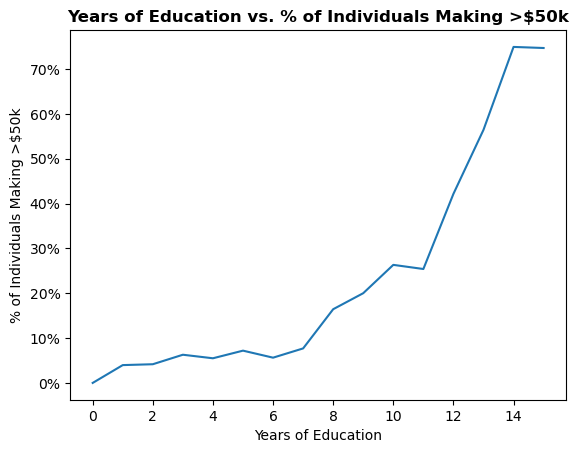

In [306]:
myDict={}
from matplotlib.ticker import PercentFormatter
#print(df["education-num"].value_counts())

for x in range(len(df)):
    my=df.iloc[x]['education-num']
    if my in myDict.keys():
        if df.iloc[x]['salary']== "<=50K":
            myDict[my]['l'] += 1
        else:
            myDict[my]['g'] += 1
    else:
        if df.iloc[x]['salary']== "<=50K":
            myDict[my]={'l': 1, 'g': 0}
        else:
            myDict[my]={'l': 0, 'g': 1}
            
rate=[]
cName=myDict.keys()
myVal={}
myVal2={}

#print(myDict)
for x in range(len(myDict)):
    num=x+1
    num2= str(num)
    myVal[num]= myDict[num2]

#print(myVal)

  
for x in myVal.keys():
    rate= myVal[x]['g'] / (myVal[x]['l'] + myVal[x]['g'])
    if rate>=0:
        myVal2[x]=rate

#print(myVal2)
      
plt.plot(np.arange(len(myVal2)), myVal2.values())
plt.xlabel("Years of Education")
plt.ylabel("% of Individuals Making >$50k")
plt.title("Years of Education vs. % of Individuals Making >$50k", fontweight='bold')
#plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()
        


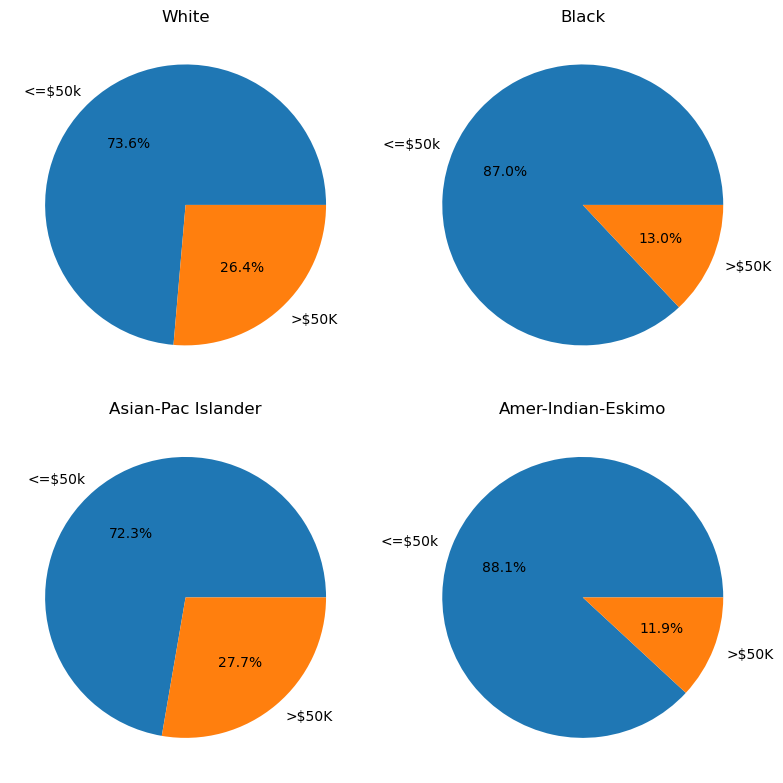

In [599]:
from statsmodels.graphics.mosaicplot import mosaic
#print(df['race'].unique())

myDict={}

for x in range(len(df)):
    my=df.iloc[x]['race']
    if my in myDict.keys():
        if df.iloc[x]['salary']== "<=50K":
            myDict[my]['l'] += 1
        else:
            myDict[my]['g'] += 1
    else:
        if df.iloc[x]['salary']== "<=50K":
            myDict[my]={'l': 1, 'g': 0}
        else:
            myDict[my]={'l': 0, 'g': 1}
            
rate=[]
cName=myDict.keys()
myVal={}
labels=["<=$50k",">$50K"]

for x in cName:
    myL=[]
    myL.append(myDict[x]['l'])
    myL.append(myDict[x]['g'])
    rate.append(myL)
    

sizes1 = [30, 40]
sizes2 = [20, 50]
sizes3 = [25, 30]
sizes4 = [40, 30]


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axes[0, 0].pie(rate[0], labels=labels, autopct='%1.1f%%')
axes[0, 0].set_title("White")

axes[0, 1].pie(rate[1], labels=labels, autopct='%1.1f%%')
axes[0, 1].set_title("Black")

axes[1, 0].pie(rate[2], labels=labels, autopct='%1.1f%%')
axes[1, 0].set_title("Asian-Pac Islander")
 
axes[1, 1].pie(rate[3], labels=labels, autopct='%1.1f%%')
axes[1, 1].set_title("Amer-Indian-Eskimo")


plt.tight_layout()
 
plt.savefig('Figure3.png', dpi=50)

plt.show()

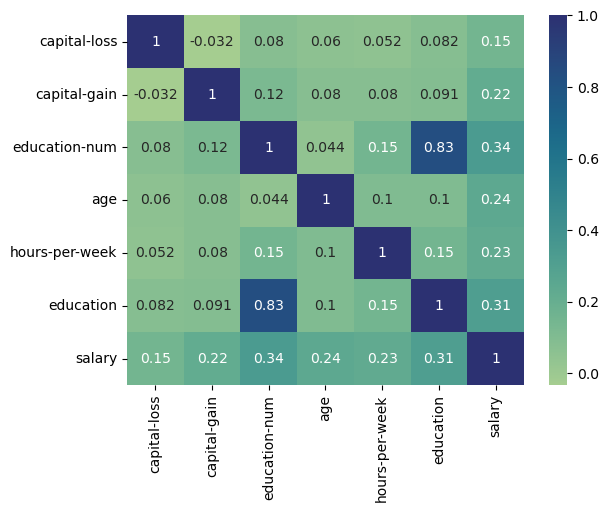

In [25]:
ed1=["Doctorate"]
ed2=["Masters"]
ed3=["Bachelors"]
ed4=["Assoc-acdm", "Assoc-voc", "Some-college", "HS-grad","Prof-school"]
ed5=["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "llth", "12th"]


df4= pd.DataFrame(df, columns=['capital-loss','capital-gain','education-num', 'age','hours-per-week', 'education', 'salary'])


for x in range(len(df4)):
    if df4.iloc[x]['salary'] == "<=50K":
        df4.iloc[x]['salary'] = 0
    else:
        df4.iloc[x]['salary'] = 1
    cg= df4.iloc[x]['education']
    if cg in ed1:
        cg=1
    elif cg in ed2:
        cg=0.8
    elif cg in ed3:
        cg=0.5
    elif cg in ed4:
        cg=0.3
    else:
        cg=0.1
    df4.iloc[x]['education']= cg
    

df2 = pd.DataFrame(df4,columns=['capital-loss','capital-gain','education-num', 'age','hours-per-week', 'education', 'salary'])
sns.heatmap(df2.corr('pearson'),annot=True,cmap='crest')
plt.show()



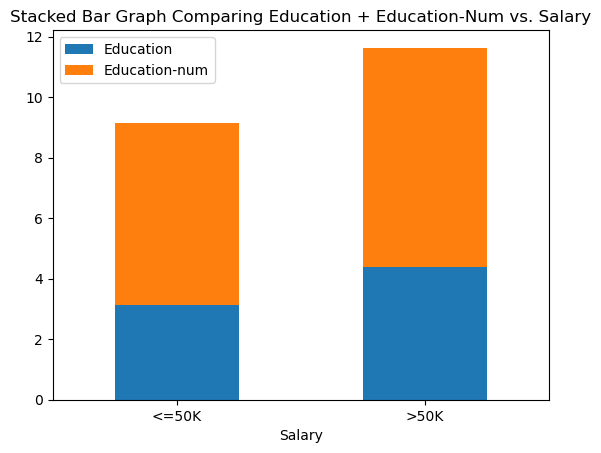

In [48]:
aCount=aC=bCount=bC=cCount=cC=dCount=dC= 0

#print(df4['education-num'].value_counts())

for x in range(len(df4)):
    if df4.iloc[x]['salary'] == 0:
        aCount += 1
        aC += df4.iloc[x]['education']*10
        bC += int(df4.iloc[x]['education-num'])/16*10
    else:    
        cCount += 1
        cC += df4.iloc[x]['education']*10
        dC += int(df4.iloc[x]['education-num'])/16*10


#print(cCount)
adf= pd.DataFrame([['<=50K', aC/aCount, bC/aCount], ['>50K', cC/cCount, dC/cCount]],
                  columns=['Salary','Education','Education-num'])

adf.plot(x='Salary', kind='bar', stacked=True,
        title='Stacked Bar Graph Comparing Education + Education-Num vs. Salary')
plt.xticks(rotation=0)
plt.show()

         Plot Comparing Age, Capital-gain, and Hours-per-week


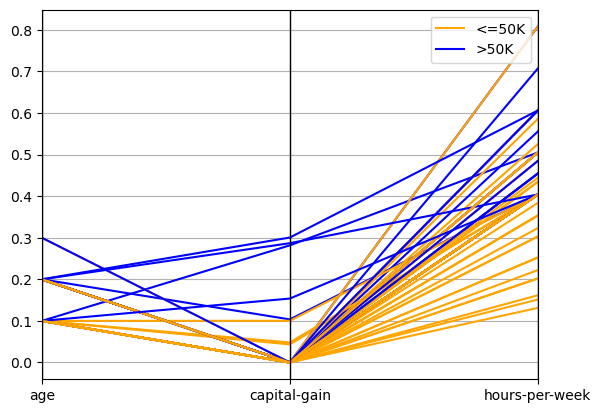

In [467]:
#from pandas.plotting import parallel_coordinates

salLess=[]
salGreat=[]
salTotal=[]
gender=["<=$50k", ">$50K"]



for x in range(len(df)):
    ag= int(df.iloc[x]['age'])
    cg= int(df.iloc[x]['capital-gain'])
    hw= int(df.iloc[x]['hours-per-week'])
    
    if df.iloc[x]['salary']=='<=50K':
        myx=[]
        if ag<41:
            myx.append(0.1)
        elif ag<65:
            myx.append(0.2)
        else:
            myx.append(0.3)
        myx.append(cg/50000)
        myx.append(hw/99)
        myx.append('<=50K')
        salLess.append(myx)
        salTotal.append(myx)
    else:
        myx=[]
        if ag <41:
            myx.append(0.1)
        elif ag <65:
            myx.append(0.2)
        else:
            myx.append(0.3)
        myx.append(cg/50000)
        myx.append(hw/99)
        myx.append('>50K')
        salGreat.append(myx)
        salTotal.append(myx)
#17-41, 41-65, 65+

data = pd.DataFrame(salTotal[0:100], columns=['age', 'capital-gain', 'hours-per-week', 'salary'])

#data = pd.DataFrame(df, columns=['age', 'capital-gain', 'hours-per-week', 'salary'])

print("         Plot Comparing Age, Capital-gain, and Hours-per-week")
plt.figure();
#print(data)
parallel_coordinates(data, 'salary', color=('orange','blue'))
plt.show()


             Box Plot Comparing Salaries and Hours-per-week


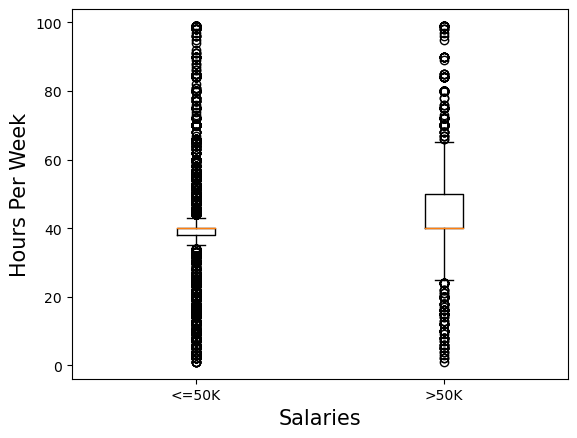

In [434]:
bpLess=[]
bpMore=[]

for x in range(len(df)):
    my=int(df.iloc[x]['hours-per-week'])
    if df.iloc[x]['salary'] == "<=50K":
        bpLess.append(my)
    else:
        bpMore.append(my)

        
        

print("             Box Plot Comparing Salaries and Hours-per-week")
#columns=['<$50K', '>$50K']
plt.boxplot([bpLess, bpMore], labels=labels)
plt.xlabel("Salaries", fontsize=15)
plt.ylabel("Hours Per Week", fontsize=15)
plt.show()

         Plot Comparing Age, Education, and Occupation


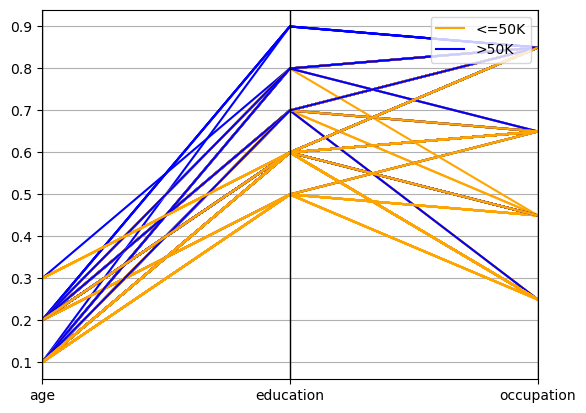

In [571]:
salLess=[]
salGreat=[]
salTotal=[]

ed1=["Doctorate"]
ed2=["Masters"]
ed3=["Bachelors"]
ed4=["Assoc-acdm", "Assoc-voc", "Some-college", "HS-grad","Prof-school"]
ed5=["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "llth", "12th"]
o1="Exec-managerial", "Prof-specialty"
o2="Sales", "Adm-clerical", "Tech-support", "Protective-serv","Machine-op-inspct" 
o3="Craft-repair",  "Farming-fishing","Transport-moving", "Armed-Forces"
o4= "Handlers-cleaners", "Priv-house-serv", "Other-service"



for x in range(len(df)):
    ag= int(df.iloc[x]['age'])
    cg= df.iloc[x]['education']
    hw= df.iloc[x]['occupation']
    
    if cg in ed1:
        cg=0.9
    elif cg in ed2:
        cg=0.8
    elif cg in ed3:
        cg=0.7
    elif cg in ed4:
        cg=0.6
    else:
        cg=0.5
        
    if hw in o1:
        hw=0.85
    elif hw  in o2:
        hw=0.65
    elif hw in o3:
        hw=0.45
    else:
        hw=0.25   
        
    
        
    if df.iloc[x]['salary']=='<=50K':
        myx=[]
        if ag<41:
            myx.append(0.1)
        elif ag<65:
            myx.append(0.2)
        else:
            myx.append(0.3)
        myx.append(cg)
        myx.append(hw)
        myx.append('<=50K')
        salLess.append(myx)
        salTotal.append(myx)
    else:
        myx=[]
        if ag <41:
            myx.append(0.1)
        elif ag <65:
            myx.append(0.2)
        else:
            myx.append(0.3)
        myx.append(cg)
        myx.append(hw)
        myx.append('>50K')
        salGreat.append(myx)
        salTotal.append(myx)
#17-41, 41-65, 65+

data = pd.DataFrame(salTotal[0:300], columns=['age', 'education', 'occupation', 'salary'])

#data = pd.DataFrame(df, columns=['age', 'capital-gain', 'hours-per-week', 'salary'])

print("         Plot Comparing Age, Education, and Occupation")
plt.figure();
#print(data)
parallel_coordinates(data, 'salary', color=('orange','blue'))
plt.show()



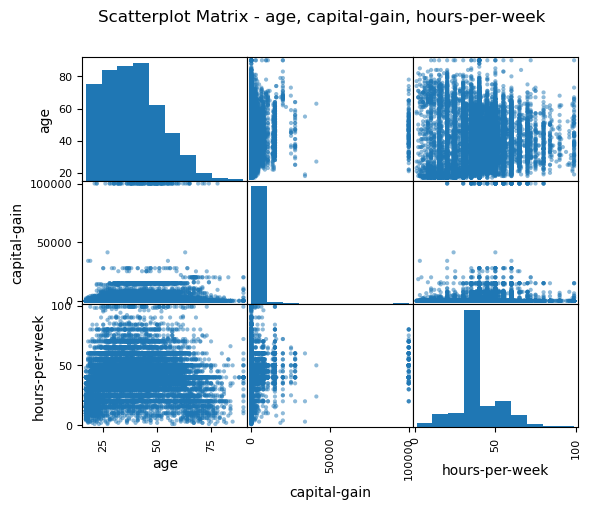

In [597]:
newdf = df[['age','capital-gain','hours-per-week']]
newdf = newdf.apply(pd.to_numeric)

pd.plotting.scatter_matrix(newdf, alpha=0.5)
plt.suptitle("Scatterplot Matrix - age, capital-gain, hours-per-week")
plt.show()


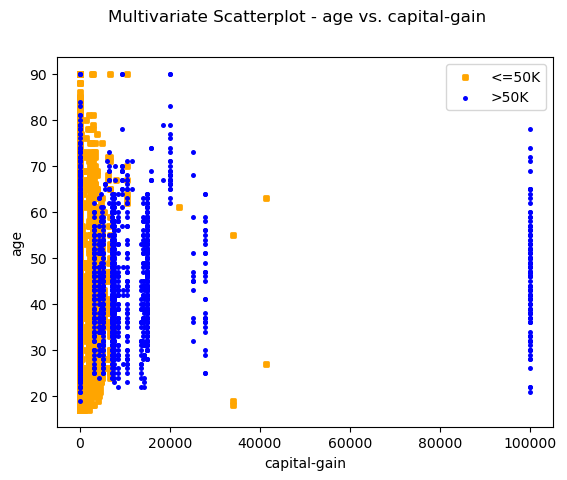

In [24]:
newdf2 = df[['age','capital-gain','hours-per-week']]
newdf2 = newdf2.apply(pd.to_numeric)

salList=[]
for x in df['salary']:
    if x =="<=50K":
        salList.append(0)
    else:
        salList.append(1)

newdf2= newdf2.assign(salary= salList)
#print(newdf2['salary'].value_counts())


plt.scatter(newdf2['capital-gain'][newdf2['salary']==0], newdf2['age'][newdf2['salary']==0], c ="orange", 
            linewidths = 2, 
            marker ="s", 
            edgecolor ="orange", 
            s = 10)
 
plt.scatter(newdf2['capital-gain'][newdf2['salary']==1], newdf2['age'][newdf2['salary']==1], c ="blue",
            linewidths = 2,
            marker =".", 
            edgecolor ="blue", 
            s = 10)
 
plt.xlabel("capital-gain")
plt.ylabel("age")
plt.legend(["<=50K", ">50K"])
plt.suptitle("Multivariate Scatterplot - age vs. capital-gain")
plt.show()

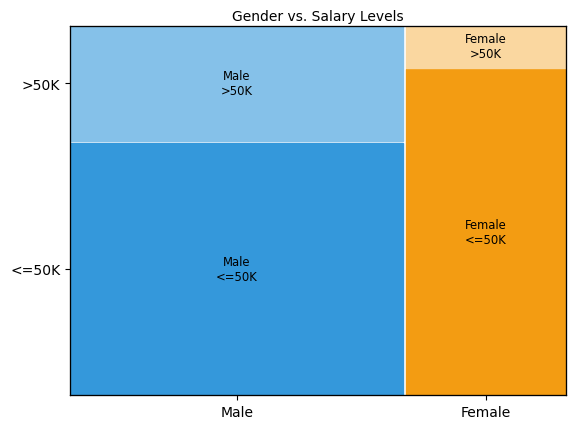

In [481]:
from statsmodels.graphics.mosaicplot import mosaic

cols = {("Male", "<=50K"):'#3498DB', ('Male','>50K'):'#85C1E9',('Female','<=50K'):'#F39C12', ('Female','>50K'):'#FAD7A0'}
mosaic(df, ["sex","salary"], properties=lambda key:{'color':cols[key]})
plt.xlabel("Gender vs. Salary Levels")
plt.show()

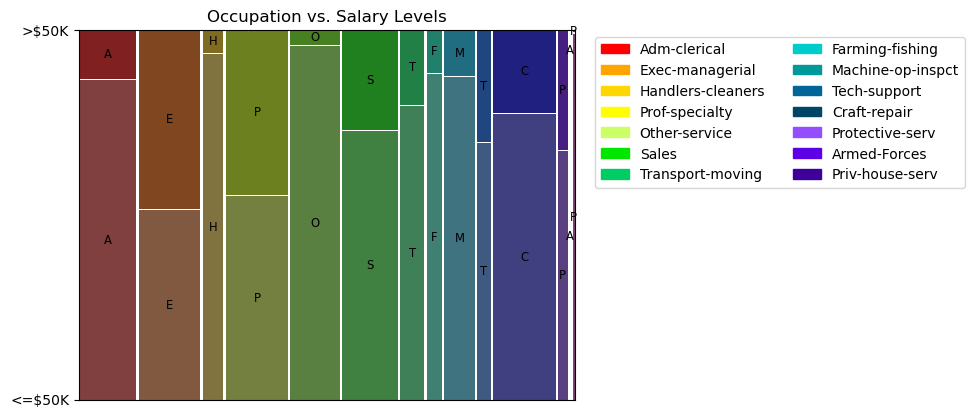

In [567]:
from statsmodels.graphics.mosaicplot import mosaic

col_dic = {'Adm-clerical':'red', 'Exec-managerial': 'orange', "Handlers-cleaners":'gold', 'Prof-specialty': 'yellow', "Other-service": "#ccff66", "Sales": "#00e600",
           "Transport-moving":'#00cc66', "Farming-fishing":'#00cccc', "Machine-op-inspct":"#009999", "Tech-support":'#006699', "Craft-repair":'#004466',
           "Protective-serv":"#944dff", "Armed-Forces":"#5c00e6", "Priv-house-serv":"#3d0099"}



def myFunc(d):
    return d[0][0:1]
    

mosaic(df, ["occupation","salary"], title="Occupation vs. Salary Levels", axes_label=False, labelizer=lambda k: myFunc(k))
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


legenditems = [(plt.Rectangle((0,0),1,1, color=col_dic[c]), "%s" %c)
                 for i,c in enumerate(df['occupation'].unique().tolist())]
plt.legend(*zip(*legenditems), loc='upper right', bbox_to_anchor=(1.8, 1), ncol=2)
plt.yticks([0, 1], ['<=$50K', '>$50K'])
plt.show()

